## Menggunakan Machine Learning Untuk Memprediksi Penyakit Jantung pada Pasien

Kolum target pada dataset heart.csv menunjukkan ada atau tidaknya penyakit jantung dari data pasien. Nilai 0 menunjukkan tidak
adanya penyakit jantung sedangkan nilai 1 menunjukkan bahwa pasien tersebut memiliki penyakit jantung.


In [17]:
#Import semua modul yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning Model yang akan digunakan dalam project kali ini
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#Untuk kebutuhan pre-processing dan report dari hasil project
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

%matplotlib inline

In [2]:
#Membaca data
data=pd.read_csv("dataset/heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Attribute Information:

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [3]:
#Buang data yang tidak dibutuhkan
data = data.drop(columns = ['restecg', 'slope', 'thal','exang'], axis=1)
data

,age,sex,cp,trestbps,chol,fbs,thalach,oldpeak,ca,target
0,63,1,3,145,233,1,150,2.3,0,1
1,37,1,2,130,250,0,187,3.5,0,1
2,41,0,1,130,204,0,172,1.4,0,1
3,56,1,1,120,236,0,178,0.8,0,1
4,57,0,0,120,354,0,163,0.6,0,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,123,0.2,0,0
299,45,1,3,110,264,0,132,1.2,0,0
300,68,1,0,144,193,1,141,3.4,2,0
301,57,1,0,130,131,0,115,1.2,1,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 33.3+ KB


## Memilih Machine Learning Model

Dalam project ini, digunakan 3 model supervised yang dapat mendeteksi target berupa klasifikasi. Target dataset yang digunakan kali ini bernilai 0 dan 1 yang sebetulnya adalah klasifikasi dari pasien penderita penyakit jantung. Nilai 0 berarti pasien tidak terkena penyakit jantung sedangkan nilai 1 berarti pasien menderita penyakit jantung.

Setelah melatih ketiga model yang digunakan dalam proyek, akan dilihat performa masing-masing model sehingga akan ditentukan model mana yang terbaik untuk mendeteksi pasien dengan penyakit jantung.

In [9]:
#Memanggil model K-NN, Support Vector Machine, dan Naive Bayes
knn_model = KNeighborsClassifier()
svm_model = SVC()
NB_model =  GaussianNB()

In [5]:
#Memisahkan kolum x sebagai atribut detektor dan y sebagai target
X = data.drop(['target'], axis=1)
Y = data['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=100)

In [10]:
#Melatih model
knn_model.fit(X_train,y_train)
svm_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

GaussianNB()

## Predict Data Train

              precision    recall  f1-score   support

           0       0.74      0.67      0.70        92
           1       0.77      0.82      0.79       120

    accuracy                           0.75       212
   macro avg       0.75      0.75      0.75       212
weighted avg       0.75      0.75      0.75       212



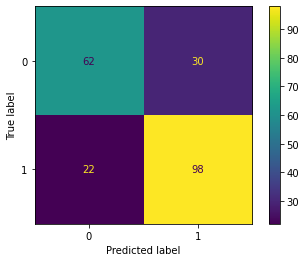

In [22]:
Ytrain_predict=knn_model.predict(X_train)
plot_confusion_matrix(knn_model, X_train, y_train)
plt.grid(False)
print(classification_report(y_train, Ytrain_predict))

              precision    recall  f1-score   support

           0       0.69      0.26      0.38        92
           1       0.62      0.91      0.73       120

    accuracy                           0.63       212
   macro avg       0.65      0.58      0.56       212
weighted avg       0.65      0.63      0.58       212



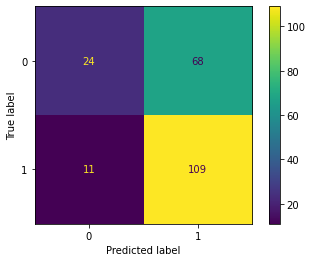

In [31]:
Ytrain_predict=svm_model.predict(X_train)
print(classification_report(y_train, Ytrain_predict))
plot_confusion_matrix(svm_model, X_train, y_train)
plt.grid(False)

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        92
           1       0.78      0.89      0.83       120

    accuracy                           0.80       212
   macro avg       0.80      0.78      0.79       212
weighted avg       0.80      0.80      0.79       212



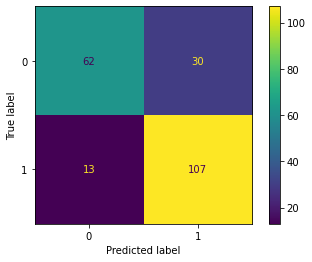

In [26]:
Ytrain_predict=NB_model.predict(X_train)
print(classification_report(y_train, Ytrain_predict))
plot_confusion_matrix(NB_model, X_train, y_train)
plt.grid(False)

## Predict Data Test

              precision    recall  f1-score   support

           0       0.73      0.52      0.61        46
           1       0.62      0.80      0.70        45

    accuracy                           0.66        91
   macro avg       0.67      0.66      0.65        91
weighted avg       0.67      0.66      0.65        91



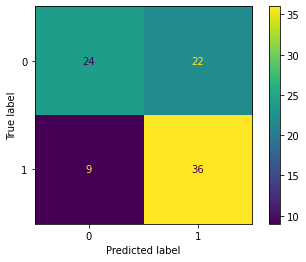

In [35]:
Ytest_predict=knn_model.predict(X_test)
print(classification_report(y_test, Ytest_predict))
plot_confusion_matrix(knn_model, X_test, y_test)
plt.grid(False)

              precision    recall  f1-score   support

           0       1.00      0.28      0.44        46
           1       0.58      1.00      0.73        45

    accuracy                           0.64        91
   macro avg       0.79      0.64      0.59        91
weighted avg       0.79      0.64      0.58        91



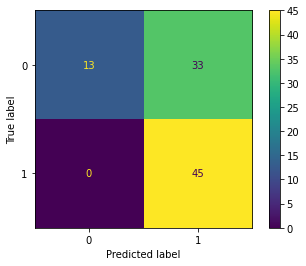

In [36]:
Ytest_predict=svm_model.predict(X_test)
print(classification_report(y_test, Ytest_predict))
plot_confusion_matrix(svm_model, X_test, y_test)
plt.grid(False)

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        46
           1       0.83      0.89      0.86        45

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



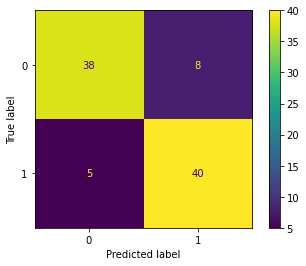

In [37]:
Ytest_predict=NB_model.predict(X_test)
print(classification_report(y_test, Ytest_predict))
plot_confusion_matrix(NB_model, X_test, y_test)
plt.grid(False)

__Analisis Presisi dan Recall__

Presisi dari model Naive Bayes menunjukkan nilai 0.88 untuk prediksi pasien tanpa penyakit jantung dan 0.83 untuk prediksi pasien dengan penyakit jantung sehingga dapat disimpulkan bahwa persentase prediksi pasien yang mempunyai penyakit jantung maupun yang tidak mempunyai penyakit jantung diklasifikasikan dengan baik.Recall dari model Naive Bayes menunjukkan nilai 0.83 untuk prediksi pasien tanpa penyakit jantung dan 0.89 untuk prediksi pasien dengan penyakit jantung sehingga dapat disimpulkan bahwa persentase data pasien yang mempunyai penyakit jantung maupun yang tidak mempunyai penyakit jantung dapat diprediksikan dengan baik.

Jika dibandingkan dengan model K-NN yang memiliki nilai 0.73 untuk prediksi pasien tanpa penyakit jantung dan 0.62 untuk prediksi pasien dengan penyakit jantung serta recall model K-NN yang memiliki nilai 0.52 untuk prediksi pasien tanpa penyakit jantung dan 0.80 untuk data pasien dengan penyakit jantung yang diprediksikan dengan benar yang berarti performa model K-NN tidak sebaik Naive Bayes.

Begitu juga dengan model SVM yang memiliki nilai presisi 1 untuk prediksi pasien tanpa penyakit jantung yang berarti model ini sangat baik mengklasifikasikan pasien tanpa penyakit jantung, namun presisi untuk prediksi pasien dengan penyakit jantung hanya bernilai 0.58 yang mana sangat tidak baik digunakan untuk mendeteksi adanya kemungkinan penyakit jantung pada pasien. Pada kasus yang diteliti, penting untuk mendeteksi pasien yang menderita penyakit jantung untuk pengobatan yang lebih baik. Jika tidak dapat mengklasifikasikan pasien dengan penderita penyakit jantung dengan baik, maka proses pengobatan terhadap pasien akan terhambat. Maka dari itu, model SVM mempunyai performa yang tidak baik untuk mendeteksi pasien penderita penyakit jantung.

__Kesimpulan Model__

Menurut hasil yang diberikan oleh ketiga model K-Nearest Neighbours, Support Vector Machine, dan Naive Bayes, didapat bahwa performa model yang paling baik ditunjukkan oleh Naive Bayes. Model Naive Bayes dapat memprediksi paling banyak pasien yang terkena penyakit jantung maupun yang tidak menderita penyakit jantung.

## Analisis Pasien dengan penyakit jantung

In [39]:
data.loc[data["target"]==1].describe()

,age,sex,cp,trestbps,chol,fbs,thalach,oldpeak,ca,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,158.466667,0.583030,0.363636,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,19.174276,0.780683,0.848894,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,96.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,149.000000,0.000000,0.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,161.000000,0.200000,0.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,172.000000,1.000000,0.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,202.000000,4.200000,4.000000,1.0


In [69]:
df=data
df['sex']=data['sex'].replace({1:"male",0:"female"})
df['target']=data['target'].replace({1:"with heart desease", 0:"without heart desease"})
df["sex"].loc[df["target"]=="with heart desease"].value_counts()

male      93
female    72
Name: sex, dtype: int64

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       138
           1       0.79      0.89      0.84       165

    accuracy                           0.82       303
   macro avg       0.82      0.81      0.81       303
weighted avg       0.82      0.82      0.81       303



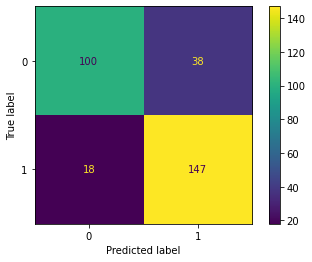

In [48]:
Y_predict=NB_model.predict(X)
print(classification_report(Y, Y_predict))
plot_confusion_matrix(NB_model, X, Y)
plt.grid(False)

Berdasarkan data pasien yang diterima, lebih banyak pasien laki-laki yang menderita penyakit jantung